# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
data = pd.read_csv(r'C:\Users\Ruchira\Desktop\unsupervised\breast-cancer-wisconsin-data.csv')

In [3]:
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [6]:
#data1 = data.drop(["ID"], axis=1)
#id column will be dropped while doing pca 

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [10]:
(data.astype(str) !='?').all(axis=0)

ID                              True
ClumpThickness                  True
Cell Size                       True
Cell Shape                      True
Marginal Adhesion               True
Single Epithelial Cell Size     True
Bare Nuclei                    False
Normal Nucleoli                 True
Bland Chromatin                 True
Mitoses                         True
Class                           True
dtype: bool

In [11]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [12]:
pd.value_counts(data['Bare Nuclei'])

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [13]:
data['Bare Nuclei'].replace("?",1, inplace =True )

In [14]:
pd.value_counts(data['Bare Nuclei'])

1     402
10    132
5      30
2      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [15]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [17]:
#changing the dytes on of Bare Nuclei into int
data['Bare Nuclei'] = data['Bare Nuclei'].astype(object).astype('int64')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [19]:
data[data.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [20]:
data.duplicated().sum()

9

In [21]:
data1=data.drop_duplicates(keep='first')

In [22]:
data1.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [23]:
# Check for correlation of variable

In [24]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
data1.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [25]:
#Let us check for pair plots

In [26]:
data2 = data1.drop(["ID"], axis=1)

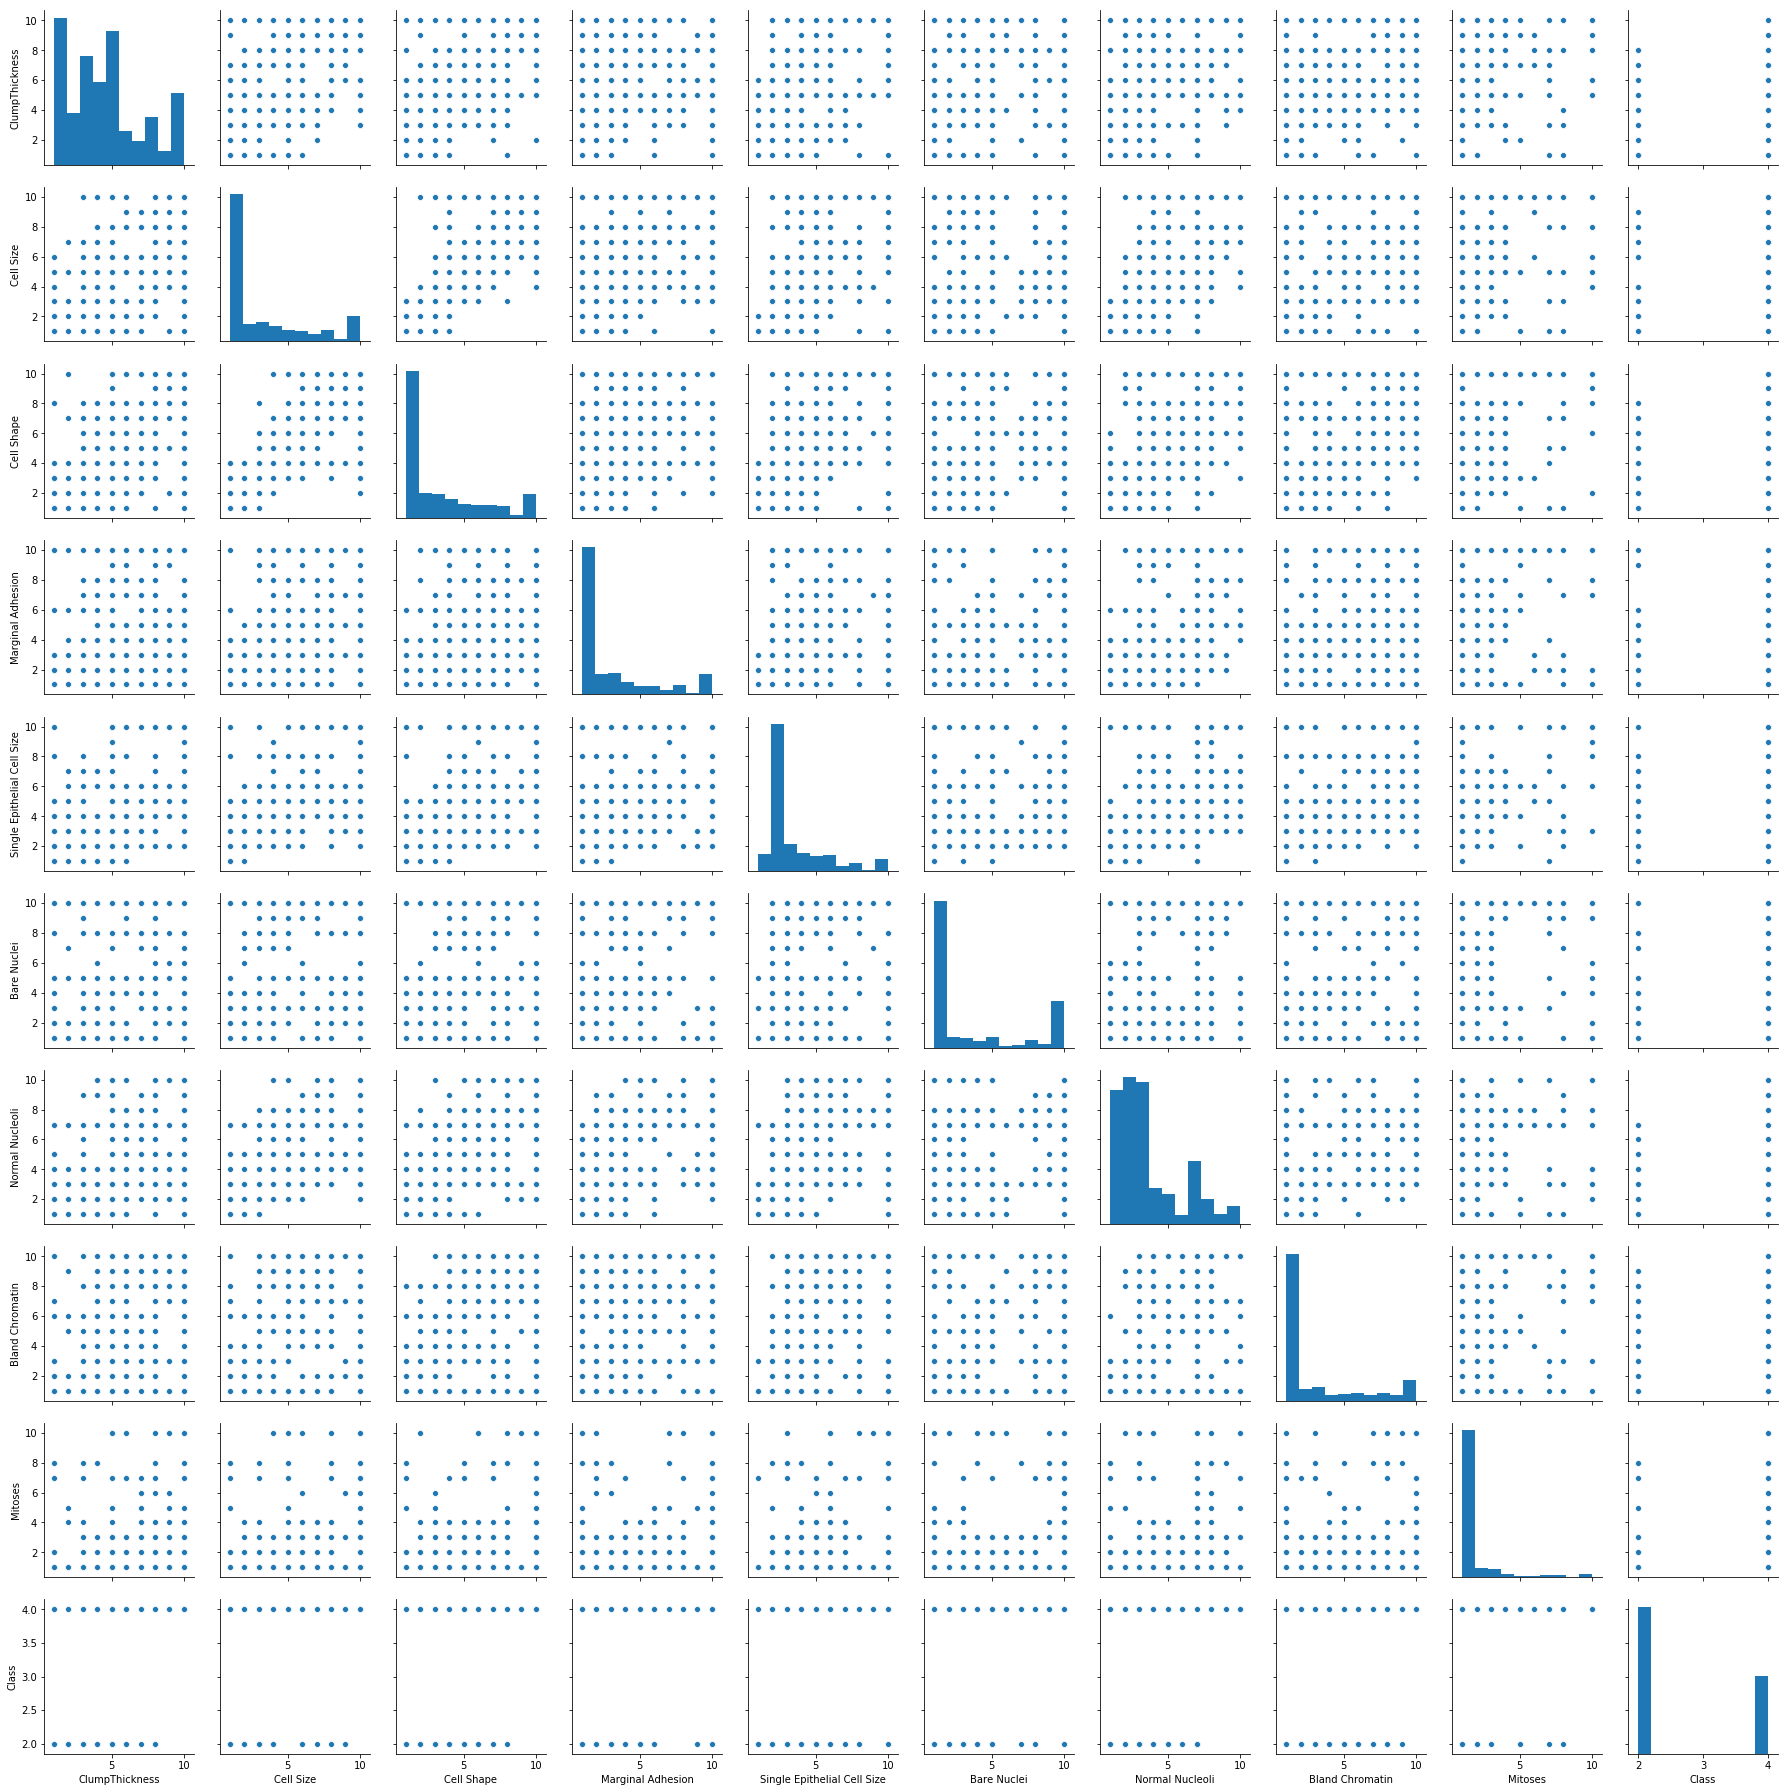

In [27]:
sns.pairplot(data2, diag_kind='auto')

C:\Users\Ruchira\Anaconda4\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ruchira\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


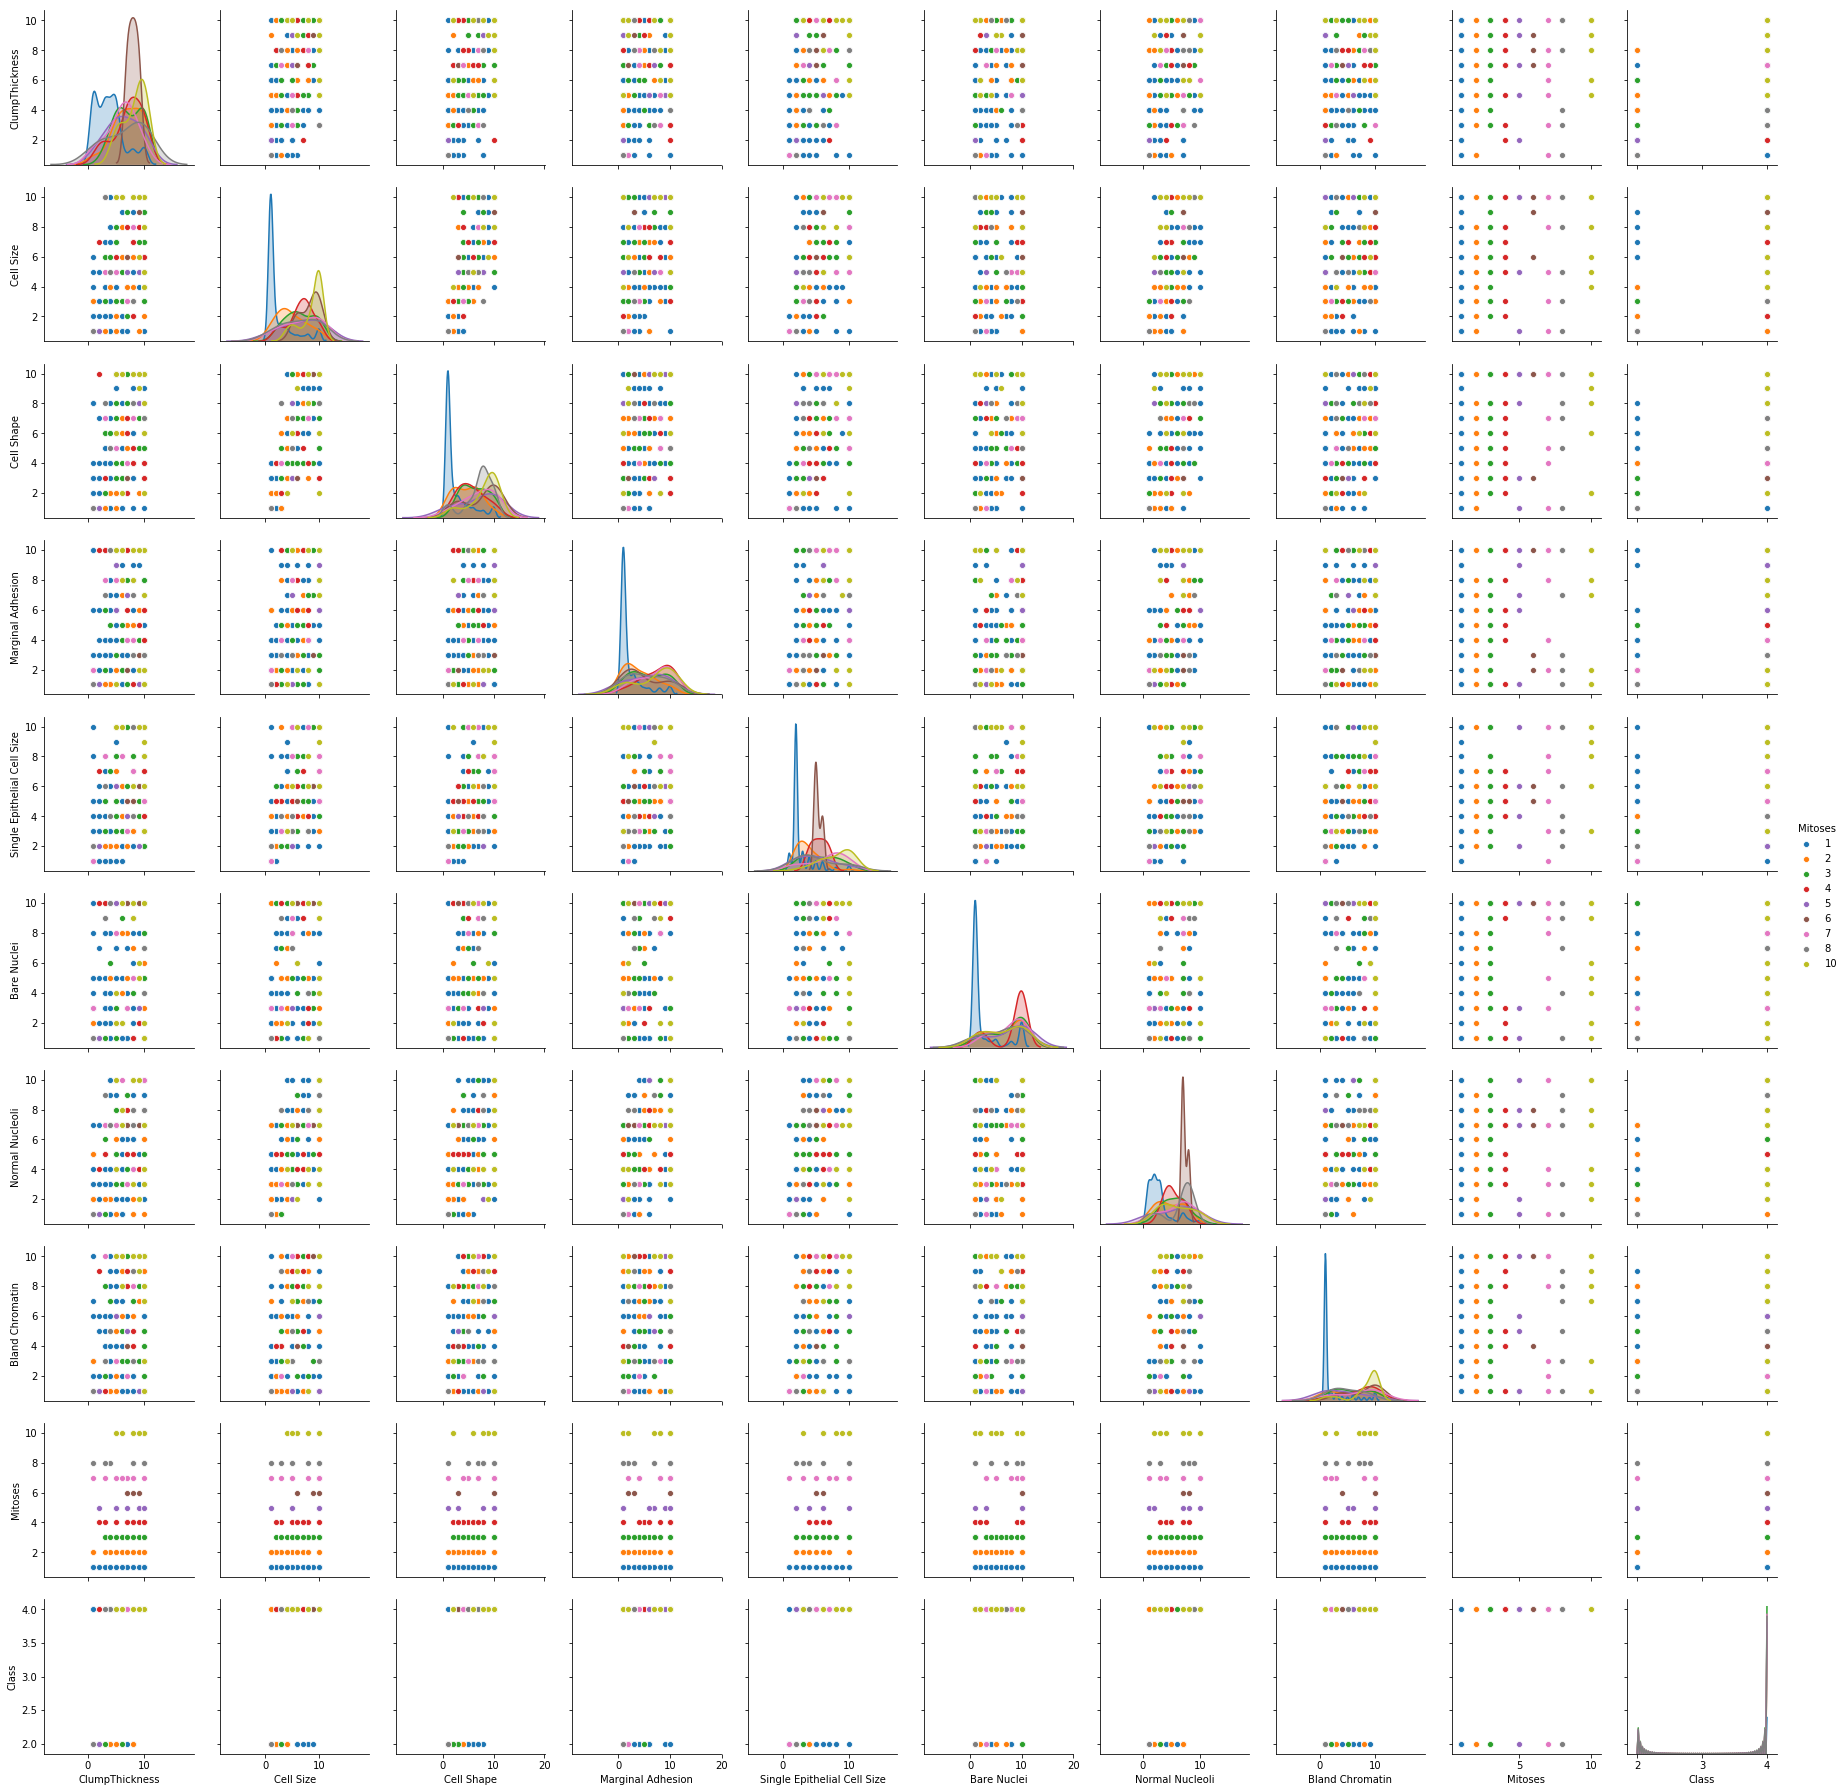

In [28]:

#dedtection of outliers
sns.pairplot(data2, hue="Mitoses")

In [29]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [30]:
# We could see most of the outliers are now removed.

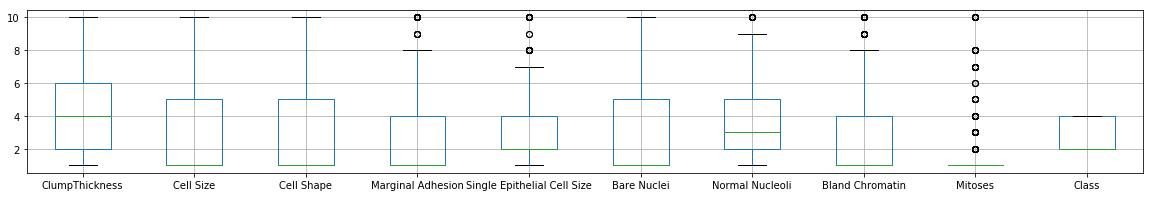

In [31]:
data2.boxplot(figsize=(20,3))

In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


In [42]:
data2["Marginal Adhesion"]=np.where(data2["Marginal Adhesion"]>8,8,data2["Marginal Adhesion"])

In [44]:
data2["Single Epithelial Cell Size"]=np.where(data2["Single Epithelial Cell Size"]>7,7,data2["Single Epithelial Cell Size"])

In [45]:
data2["Normal Nucleoli"]=np.where(data2["Normal Nucleoli"]>9,9,data2["Normal Nucleoli"])

In [46]:
data2["Bland Chromatin"]=np.where(data2["Bland Chromatin"]>8,8,data2["Bland Chromatin"])

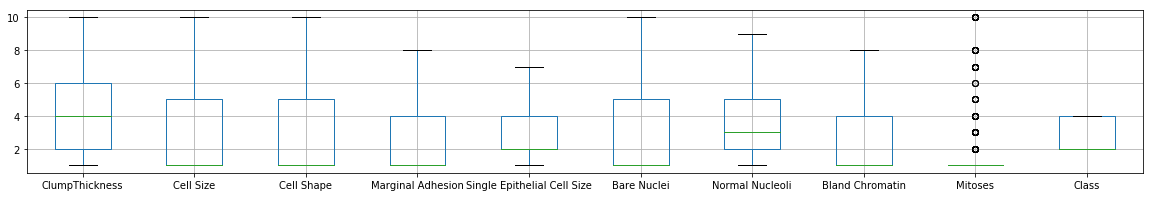

In [47]:
data2.boxplot(figsize=(20,3))

In [50]:
data2["Mitoses"]=np.where(data2["Mitoses"]>2,2,data2["Mitoses"])

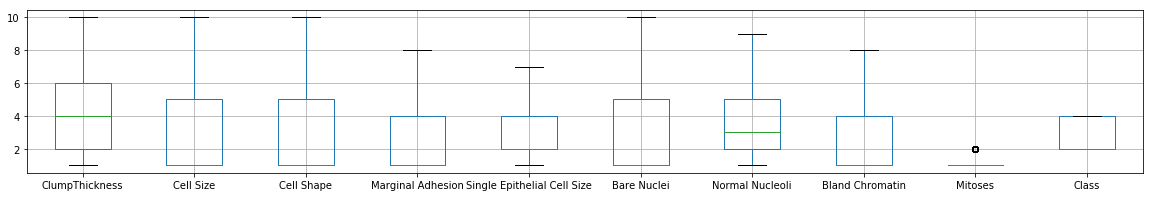

In [51]:
data2.boxplot(figsize=(20,3))

# Q6 Create a covariance matrix for identifying Principal components

In [35]:
# PCA
# Step 1 - Create covariance matrix


In [72]:
# split data table into data X and class labels y
X = data2.drop(["Class"], axis=1)
y = data2["Class"]
# standardize the data
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

C:\Users\Ruchira\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ruchira\Anaconda4\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [73]:
# Get eigen value and eigen vector from the variance covariance matriz
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)



Covariance Matrix 
%s [[ 1.00143266  0.64583645  0.65552689  0.50419416  0.55064449  0.5908535
   0.56480769  0.54951479  0.44270396 -0.05538768  1.00143266]
 [ 0.64583645  1.00143266  0.90818117  0.72434051  0.78565647  0.68765657
   0.75667644  0.72848823  0.49446483 -0.04166294  0.64583645]
 [ 0.65552689  0.90818117  1.00143266  0.69879112  0.75601336  0.70848734
   0.73716701  0.72311963  0.46579632 -0.04163563  0.65552689]
 [ 0.50419416  0.72434051  0.69879112  1.00143266  0.66107459  0.68359143
   0.68552561  0.63437066  0.44810019 -0.06300196  0.50419416]
 [ 0.55064449  0.78565647  0.75601336  0.66107459  1.00143266  0.62943312
   0.65783349  0.68663071  0.47597504 -0.05271893  0.55064449]
 [ 0.5908535   0.68765657  0.70848734  0.68359143  0.62943312  1.00143266
   0.68309577  0.59778885  0.4667265  -0.09266525  0.5908535 ]
 [ 0.56480769  0.75667644  0.73716701  0.68552561  0.65783349  0.68309577
   1.00143266  0.67688854  0.39676478 -0.06179038  0.56480769]
 [ 0.54951479  0.728

# Q7 Identify eigen values and eigen vector

In [74]:
# Step 2- Get eigen values and eigen vector

In [75]:

e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 3.08517352e-01  6.19290689e-01  7.33395802e-03  8.17035262e-02
  -7.07106781e-01 -3.07748094e-03 -5.49562234e-03  5.67987965e-02
  -1.63909603e-02 -1.04558012e-01  1.00007868e-02]
 [ 3.53471677e-01 -1.36649542e-01  4.90942072e-02  1.01792460e-01
   2.87622643e-15 -7.36423638e-01 -2.13686255e-01 -3.38543513e-01
   2.29747670e-01  1.02934438e-01 -2.78639444e-01]
 [ 3.50477020e-01 -1.03292064e-01  4.80110285e-02  1.42144987e-01
  -8.79880914e-16  6.60055641e-01 -1.82929066e-01 -5.03450540e-01
   2.16137710e-01  2.02010799e-01 -1.84020492e-01]
 [ 3.12025728e-01 -2.85743393e-01 -2.16299185e-03  5.67600759e-02
  -2.11852557e-15  5.24269579e-02  4.09287051e-01 -5.25308578e-02
   7.21635285e-02 -7.96880840e-01 -6.71837691e-02]
 [ 3.22623055e-01 -2.11219031e-01  2.65671815e-02  5.96271512e-03
   6.62884360e-16  7.33395969e-02 -3.55411201e-01  6.22422155e-01
   5.10559850e-01  7.48178754e-03  2.65945523e-01]
 [ 3.16221058e-01 -8.12595101e-02 -4.83374547e-02  4.96397455e-02
   3.

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 60.60411504  69.68179543  78.13327083  84.37783381  88.44742852
  91.56593997  94.34095198  96.91593896  99.20209465 100.
 100.        ]


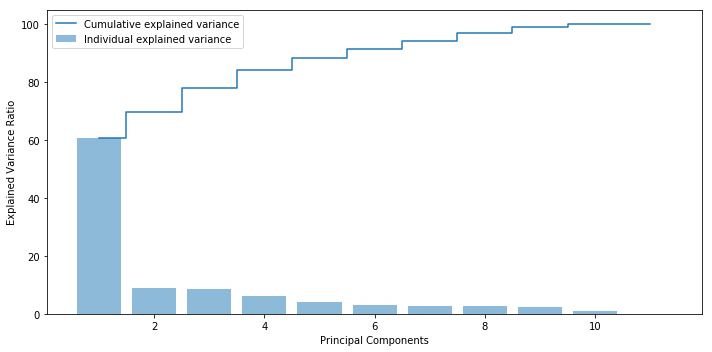

In [76]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [82]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 4 to 2)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-1.35658099,  1.66708698, -1.70859346, ...,  4.24262424,
         2.07461142,  2.46490446],
       [-0.16074624, -0.10288086, -0.15966645, ..., -0.02543838,
        -0.11721373, -0.09455344],
       [-0.93852239,  0.63092719, -0.03589865, ...,  1.48674346,
         1.35929793,  1.5458721 ],
       [-0.22364745, -0.67110939, -0.12023138, ...,  1.16661391,
        -1.19648825, -1.38905223],
       [ 0.0170336 , -0.69425092, -0.17086679, ...,  2.17412378,
         0.43847449,  0.09367576],
       [-0.23006296,  1.6769507 , -0.19057555, ..., -0.06213171,
        -1.31622774, -0.35159947]])

C:\Users\Ruchira\Anaconda4\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


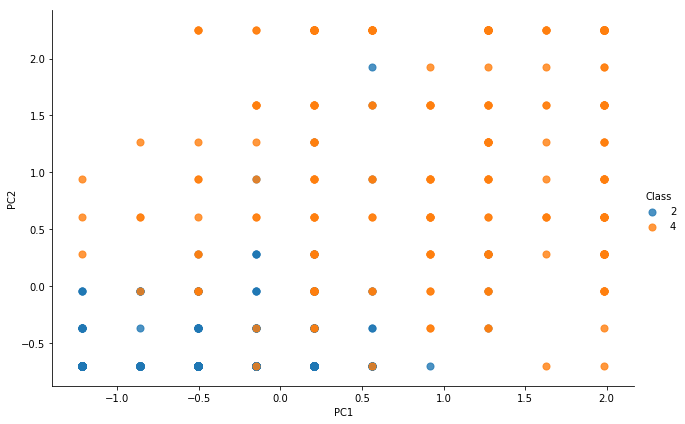

In [83]:
## Plot of PC1 and PC2
data2["PC1"] = X_sd[:,0]
data2["PC2"] = X_sd[:,1]
vis = sns.lmplot(data = data2[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

# Q10 Find correlation between components and features

In [84]:
# Loadings or Eigen vectors on the PCA components
pca.components_

array([[ 0.30851735,  0.35347168,  0.35047702,  0.31202573,  0.32262305,
         0.31622106,  0.32183373,  0.31645039,  0.23598617, -0.03176479,
         0.30851735],
       [ 0.00733396,  0.04909421,  0.04801103, -0.00216299,  0.02656718,
        -0.04833745,  0.00885367,  0.01364721, -0.02908082,  0.99549977,
         0.00733396],
       [-0.61929069,  0.13664954,  0.10329206,  0.28574339,  0.21121903,
         0.08125951,  0.19068107,  0.18392513, -0.02212206, -0.00852972,
        -0.61929069],
       [-0.08170353, -0.10179246, -0.14214499, -0.05676008, -0.00596272,
        -0.04963975, -0.2284268 ,  0.0743917 ,  0.94398304,  0.03929235,
        -0.08170353],
       [ 0.00549562,  0.21368626,  0.18292907, -0.40928705,  0.3554112 ,
        -0.64567352, -0.14246339,  0.42463444, -0.06989538, -0.06776307,
         0.00549562],
       [-0.01639096,  0.22974767,  0.21613771,  0.07216353,  0.51055985,
         0.0603062 , -0.47445585, -0.63637533,  0.00135267, -0.01906991,
        -0.016

In [87]:
data3 = pd.DataFrame(pca.components_, columns = list(X))

In [88]:
data3

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,PC1,PC2
0,0.308517,0.353472,0.350477,0.312026,0.322623,0.316221,0.321834,0.316450,0.235986,-0.031765,0.308517
1,0.007334,0.049094,0.048011,-0.002163,0.026567,-0.048337,0.008854,0.013647,-0.029081,0.995500,0.007334
2,-0.619291,0.136650,0.103292,0.285743,0.211219,0.081260,0.190681,0.183925,-0.022122,-0.008530,-0.619291
3,-0.081704,-0.101792,-0.142145,-0.056760,-0.005963,-0.049640,-0.228427,0.074392,0.943983,0.039292,-0.081704
4,0.005496,0.213686,0.182929,-0.409287,0.355411,-0.645674,-0.142463,0.424634,-0.069895,-0.067763,0.005496
5,-0.016391,0.229748,0.216138,0.072164,0.510560,0.060306,-0.474456,-0.636375,0.001353,-0.019070,-0.016391


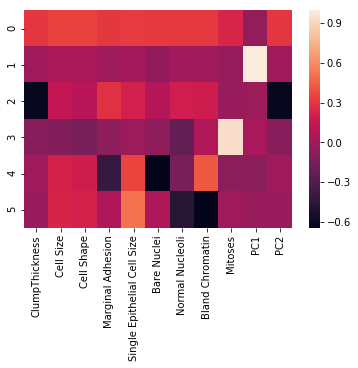

In [115]:
sns.heatmap(data3)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [89]:
import numpy as np
import pandas as pd

In [90]:
df = pd.read_csv(r'C:\Users\Ruchira\Desktop\unsupervised\jokes.csv')
df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [96]:
df.shape

(24983, 101)

In [66]:
df.dtypes

NumJokes      int64
Joke1       float64
Joke2       float64
Joke3       float64
Joke4       float64
Joke5       float64
Joke6       float64
Joke7       float64
Joke8       float64
Joke9       float64
Joke10      float64
Joke11      float64
Joke12      float64
Joke13      float64
Joke14      float64
Joke15      float64
Joke16      float64
Joke17      float64
Joke18      float64
Joke19      float64
Joke20      float64
Joke21      float64
Joke22      float64
Joke23      float64
Joke24      float64
Joke25      float64
Joke26      float64
Joke27      float64
Joke28      float64
Joke29      float64
             ...   
Joke71      float64
Joke72      float64
Joke73      float64
Joke74      float64
Joke75      float64
Joke76      float64
Joke77      float64
Joke78      float64
Joke79      float64
Joke80      float64
Joke81      float64
Joke82      float64
Joke83      float64
Joke84      float64
Joke85      float64
Joke86      float64
Joke87      float64
Joke88      float64
Joke89      float64


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [100]:
df1=df.head(200)
df1

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,1.00,1.00,1.00,1.00,1.00,-5.63,1.00,1.00,1.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,1.00,1.00,1.00,1.00,9.03,9.27,9.03,9.27,1.00,...,1.00,1.00,1.00,9.08,1.00,1.00,1.00,1.00,1.00,1.00
3,48,1.00,8.35,1.00,1.00,1.80,8.16,-2.82,6.21,1.00,...,1.00,1.00,1.00,0.53,1.00,1.00,1.00,1.00,1.00,1.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,1.00,1.00,1.00,1.00,8.59,-9.85,7.72,8.79,1.00,...,1.00,1.00,1.00,1.00,1.00,2.33,1.00,1.00,1.00,1.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,1.00,4.47,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [106]:
r = df1.iloc[:,1:]

# Q13 Change the column indices from 0 to 99

In [107]:
r.columns = range(100)

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [108]:
ratings=r.replace(99.00,0)
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,1.00,1.00,1.00,1.00,1.00,-5.63,1.00,1.00,1.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,1.00,1.00,1.00,1.00,9.03,9.27,9.03,9.27,1.00,1.00,...,1.00,1.00,1.00,9.08,1.00,1.00,1.00,1.00,1.00,1.00
3,1.00,8.35,1.00,1.00,1.80,8.16,-2.82,6.21,1.00,1.84,...,1.00,1.00,1.00,0.53,1.00,1.00,1.00,1.00,1.00,1.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,1.00,1.00,1.00,1.00,8.59,-9.85,7.72,8.79,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,2.33,1.00,1.00,1.00,1.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,1.00,4.47,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [109]:
ratings_diff = StandardScaler().fit_transform(ratings)

In [110]:
ratings_diff=pd.DataFrame(X_sd)

In [111]:
ratings_diff

,0,1,2,3,4,5,6,7,8,9,10
0,0.206936,-0.699995,-0.743299,-0.665850,-0.590091,-0.686979,-0.173064,-0.636797,-0.455251,-0.116239,0.206936
1,0.206936,0.283845,0.266875,0.955855,2.227351,1.799664,-0.173064,-0.255374,-0.455251,-0.111504,0.206936
2,-0.503866,-0.699995,-0.743299,-0.665850,-0.590091,-0.410685,-0.173064,-0.636797,-0.455251,-0.091265,-0.503866
3,0.562336,1.595632,1.613773,-0.665850,-0.026602,0.141902,-0.173064,1.651743,-0.455251,-0.089884,0.562336
4,-0.148465,-0.699995,-0.743299,0.145002,-0.590091,-0.686979,-0.173064,-0.636797,-0.455251,-0.088674,-0.148465
5,1.273138,2.251526,2.287222,2.172134,2.227351,1.799664,2.364805,1.651743,-0.455251,-0.088513,1.273138
6,-1.214667,-0.699995,-0.743299,-0.665850,-0.590091,1.799664,-0.173064,-0.636797,-0.455251,-0.086929,-1.214667
7,-0.859266,-0.699995,-0.406574,-0.665850,-0.590091,-0.686979,-0.173064,-0.636797,-0.455251,-0.086180,-0.859266
8,-0.859266,-0.699995,-0.743299,-0.665850,-0.590091,-0.686979,-1.019020,-0.636797,2.196588,-0.062638,-0.859266
9,-0.148465,-0.372048,-0.743299,-0.665850,-0.590091,-0.686979,-0.596042,-0.636797,-0.455251,-0.062638,-0.148465


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [112]:
X_sd3=ratings_diff.describe()

In [113]:
rt = ratings_diff.mean()

In [114]:
rt.sort_values(ascending = False).head(10)

8     1.301137e-15
5     7.026648e-16
0     1.655011e-16
10    1.373087e-16
4     1.651834e-17
9    -5.876717e-17
7    -6.448506e-17
3    -1.662952e-16
6    -2.096559e-16
1    -2.801765e-16
dtype: float64